In [9]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from importlib import reload
import a2_6 as a2
from a2_1 import rng,box_muller
seed = 627310980
print('Seed:',seed)
rng = rng(seed)

Seed: 627310980


In [3]:
filename = 'GRBs.txt'
url = 'https://home.strw.leidenuniv.nl/~nobels/coursedata/'
if not os.path.isfile(filename):
    print(f'File not found, downloading {filename}')
    os.system('wget '+url+filename)

data = np.genfromtxt(filename,skip_header=2,usecols = (2,3,4,5,6,7))
data[data==-1.0] = 0
names = np.genfromtxt(filename,skip_header=2,usecols=0,dtype=str)
data = data[names!='XRF']
labels = np.zeros(len(data))
labels[data[:,1]>=10] += 1
data = data[:,[0,2,3,4,5]]
train_percent = 0.8
train_in = data[:int(len(data)*train_percent)]
train_out = labels[:int(len(labels)*train_percent)]
test_in = data[int(len(data)*train_percent):]
test_out = labels[int(len(labels)*train_percent):]

dim_1_train = len(train_in) # 1707. Number of bursts in training data.
dim_1_test = len(test_in) # Number of bursts in testing data.
dim_2 = len(train_in[0]) # 7 parameters
dim_3 = 2 # Number of possible classifications

In [46]:
reload(a2)
for i in range(1):
    #sys.stdout.write("Run {0}\n".format(i+1))
    weights = a2.train_perceptron(train_in, train_out,rng)
    print('Training set')
    a2.test_perceptron(train_in,train_out,weights)
    print('Test set')
    a2.test_perceptron(test_in,test_out,weights)
    print('Entire data set')
    a2.test_perceptron(test_in,test_out,weights)

/data1/MRP1/numerical_recipes/a2/a2_1.py:22: RuntimeWarning: overflow encountered in long_scalars
  self.state = self.a*(x&(2**32-1))+(x>>32)


Iterations:10000
Training set
Accuracy:76.1%

Test set
Accuracy:93.2%

Entire data set
Accuracy:93.2%



Entire data set
Accuracy:79.5%



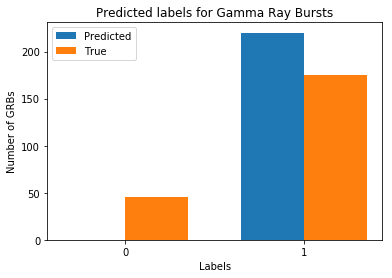

In [49]:
reload(a2)
print('Entire data set')
a2.test_perceptron(data,labels,weights,hist=True)